# Prerequisites

In ordert to plot graphs unsing __Seaborn__ you need to install it first, just follow the instructions here: https://stanford.edu/~mwaskom/software/seaborn/installing.html.

I installed it using **```pip install seaborn```** (under python2 (anaconda) and Ubuntu 16.04).

In [2]:
# Standard imports
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Show plots inline
%matplotlib inline

## Histograms

(array([  4.,   4.,  10.,   9.,  18.,  25.,  17.,   6.,   5.,   2.]),
 array([-2.96852655, -2.38985805, -1.81118955, -1.23252105, -0.65385255,
        -0.07518405,  0.50348444,  1.08215294,  1.66082144,  2.23948994,
         2.81815844]),
 <a list of 10 Patch objects>)

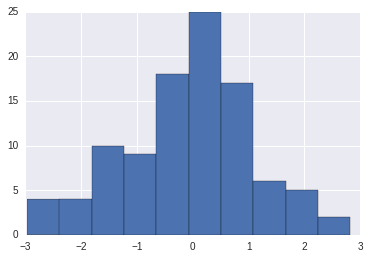

In [9]:
# Histogram
dataset1 = randn(100)
plt.hist(dataset1)

(array([  1.,   2.,   3.,  11.,  11.,  18.,  14.,  11.,   6.,   3.]),
 array([-2.98655655, -2.46666289, -1.94676922, -1.42687555, -0.90698189,
        -0.38708822,  0.13280544,  0.65269911,  1.17259278,  1.69248644,
         2.21238011]),
 <a list of 10 Patch objects>)

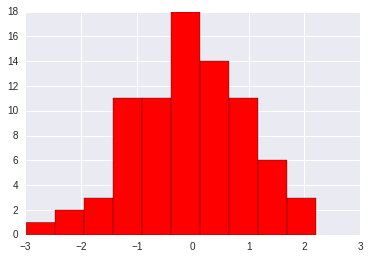

In [11]:
dataset2 = randn(80)
plt.hist(dataset2, color="red")

(array([ 0.04808676,  0.        ,  0.04808676,  0.04808676,  0.09617351,
         0.04808676,  0.19234703,  0.33660729,  0.24043378,  0.28852054,
         0.43278081,  0.43278081,  0.28852054,  0.38469405,  0.52895432,
         0.        ,  0.28852054,  0.        ,  0.04808676,  0.09617351]),
 array([-2.98655655, -2.72660972, -2.46666289, -2.20671605, -1.94676922,
        -1.68682239, -1.42687555, -1.16692872, -0.90698189, -0.64703505,
        -0.38708822, -0.12714139,  0.13280544,  0.39275228,  0.65269911,
         0.91264594,  1.17259278,  1.43253961,  1.69248644,  1.95243328,
         2.21238011]),
 <a list of 20 Patch objects>)

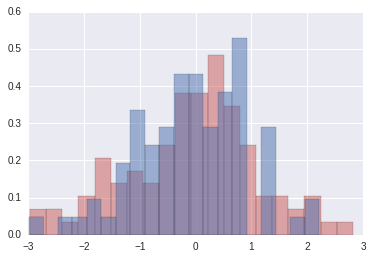

In [15]:
# Overlaping two histograms
# Note: It's important to normalize both datasets (normed = True) and the number of bins.
#       Also it's importat to change the alpha value to add transparency.
plt.hist(dataset1, normed = True, color = "indianred", alpha = 0.5, bins = 20)
plt.hist(dataset2, normed = True, alpha = 0.5, bins = 20)

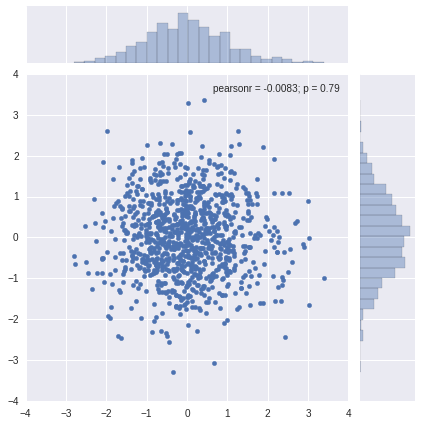

In [17]:
# Joint plot using seaborn
data1 = randn(1000)
data2 = randn(1000)
sns.jointplot(data1, data2)

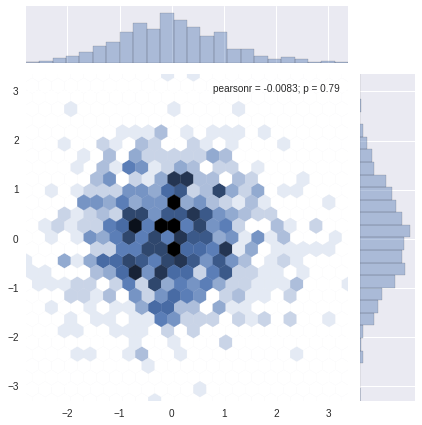

In [20]:
sns.jointplot(data1, data2, kind = "hex")

## Kernel Density Estimation Plots

More info: https://en.wikipedia.org/wiki/Kernel_density_estimation.

(array([ 1.,  1.,  4.,  5.,  3.,  3.,  3.,  2.,  1.,  2.]),
 array([-2.01918497, -1.5581098 , -1.09703464, -0.63595947, -0.1748843 ,
         0.28619087,  0.74726603,  1.2083412 ,  1.66941637,  2.13049154,
         2.5915667 ]),
 <a list of 10 Patch objects>)

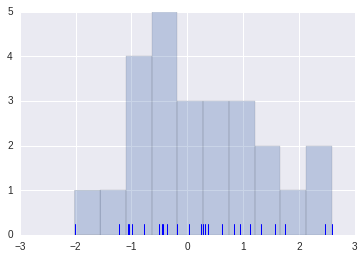

In [29]:
dataset = randn(25)
sns.rugplot(dataset) # Plots the ticks
plt.hist(dataset, alpha = 0.3)

(0, 1)

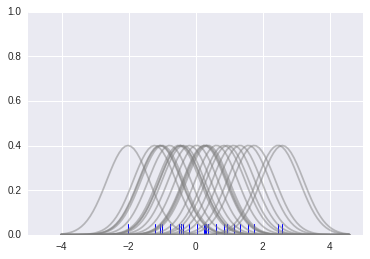

In [31]:
# Creating the Kernel Densitiy Plot
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwith = ((4 * dataset.std() **5) / (3 * len(dataset))) **0.2 # Formula from the Wikipedia explanation

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = "grey", alpha = 0.5)

plt.ylim(0, 1)